In [1]:
from keras.models import load_model
# Import all packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sys
from keras.preprocessing.image import img_to_array
import tensorflow as tf
import pickle
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


In [27]:
import math

def font_size_calculator(img_shape):
    font_size = math.ceil(img_shape[0] / 800)
    return font_size

def font_width_calculator(img_shape):
    font_width = math.ceil(img_shape[0] / 400)
    return font_width

def calculate_text_position(img_shape):
    x = math.ceil(img_shape[1] / 40) 
    y = math.ceil(img_shape[0] / 40) + math.ceil(img_shape[0] / 100)
    return x,y

In [6]:
project_path = "/home/mate/develop/PycharmProjects/GeFace/"

# load the trained convolutional neural network from disk, followed
# by the category and color label binarizers, respectively
print("[INFO] loading network...")
model = load_model(project_path  + "faces_model/regression.hdf5", custom_objects={"tf": tf})
agesLB = pickle.loads(open(project_path + "faces_model/regression.label", "rb").read())


[INFO] loading network...


In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 47, 47, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 47, 47, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 47, 47, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

[]
[array([[[[ 1.94350377e-01, -2.44354934e-01, -1.23165339e-01,
          -2.44789049e-01, -6.94921091e-02, -2.57098675e-01,
           1.16846645e-02, -2.73523983e-02, -3.27926129e-01,
          -7.52755553e-02, -1.76265061e-01, -1.42736986e-01,
           2.68852897e-02, -2.74745412e-02, -1.84915334e-01,
          -2.91401297e-01,  2.52384134e-02, -1.08303137e-01,
          -9.61645395e-02, -1.62336007e-01,  1.22835487e-02,
           1.12171629e-02,  3.02937515e-02,  9.39681754e-02,
          -6.88311970e-03, -6.28693849e-02,  2.05809951e-01,
          -4.12518531e-02,  4.49412204e-02,  5.02560064e-02,
           7.89505988e-02,  7.68040866e-02],
         [ 1.23604447e-01, -1.80274099e-01,  1.15649186e-01,
          -2.70030379e-01,  4.22240868e-02, -2.63660669e-01,
           1.33118480e-01,  1.84268892e-01, -3.39332372e-02,
          -4.53723520e-02, -1.08408481e-02, -1.34545833e-01,
           5.00408038e-02,  1.91712216e-01,  1.72419295e-01,
          -1.60936370e-01, -1.422047

[array([0.8757843 , 1.4816021 , 1.6192108 , 0.60074294, 0.88926965,
       0.8193394 , 0.814775  , 0.9583049 , 0.6904464 , 0.6443889 ,
       0.7904167 , 0.6321075 , 0.85215265, 0.58097726, 0.8665852 ,
       0.5874172 , 1.0407292 , 0.55325073, 0.693531  , 0.88138884,
       0.8971575 , 1.1306012 , 0.8529346 , 0.8678523 , 1.6364794 ,
       0.85909843, 0.82773817, 0.47769445, 0.3366584 , 0.78604746,
       0.84680927, 1.0431529 ], dtype=float32), array([-0.12200528,  0.28900692, -0.22191028, -0.3547597 ,  0.3951019 ,
       -0.121091  ,  0.02819488,  0.03930311, -0.1807016 , -0.35796723,
        0.2545665 , -0.13385303, -0.24588403, -0.3996422 , -0.0266785 ,
       -0.5633377 ,  0.4194439 , -0.50088835, -0.2264964 ,  0.09799543,
        0.00300362,  0.05326283, -0.03356185,  0.08821383, -0.10183615,
       -0.05526799,  0.3317007 , -0.25945184, -0.35331735, -0.14897375,
       -0.24183297,  0.15710077], dtype=float32), array([-0.00888284, -0.01105883,  0.00744823,  0.34737748, -0.00212

[array([1.0193784 , 1.0618169 , 0.9427115 , 0.95682335, 1.1207284 ,
       0.8206796 , 1.108554  , 0.9310474 , 1.0050147 , 1.0779536 ,
       1.2278143 , 1.0789149 , 1.1008159 , 1.0137266 , 1.1480916 ,
       0.8810246 , 0.81038177, 0.8567439 , 0.8213451 , 0.9793872 ,
       0.8963251 , 0.88206154, 0.8686158 , 0.93219775, 1.135074  ,
       1.0690657 , 0.90909296, 1.1308849 , 0.71591455, 0.8568774 ,
       1.0246109 , 1.0045882 , 0.8984112 , 0.9522584 , 0.8370804 ,
       1.0038819 , 0.9387628 , 1.229916  , 1.0142874 , 0.97252774,
       1.0216538 , 0.93148303, 0.8641466 , 0.83237123, 1.1130701 ,
       0.9616375 , 1.1691718 , 1.2038931 , 0.967812  , 0.9422366 ,
       0.9179964 , 1.0762259 , 1.0884547 , 0.8261936 , 1.0099139 ,
       1.0426341 , 0.9717579 , 1.1098293 , 1.0931189 , 0.83592755,
       1.0853751 , 1.0131233 , 0.8877756 , 0.9683257 ], dtype=float32), array([-0.02193417,  0.03972763, -0.21048638, -0.04969863, -0.04575945,
       -0.3490503 ,  0.18244402,  0.04437215, -0.11

[array([1.1023221 , 1.1098502 , 1.1537924 , 1.108848  , 1.345536  ,
       1.0358057 , 0.7640196 , 0.9723649 , 0.7475824 , 0.8575937 ,
       0.82058156, 0.98994166, 0.93452364, 1.1409415 , 0.95147634,
       0.93329644, 1.0282133 , 0.90391046, 0.7589831 , 1.1117525 ,
       0.9497539 , 1.0660217 , 1.0067023 , 1.1026076 , 1.091354  ,
       1.1547185 , 1.126718  , 1.0043093 , 1.0223855 , 0.9025315 ,
       1.056903  , 0.9924939 , 1.1200575 , 1.1135441 , 1.0331    ,
       0.96517366, 0.95996845, 1.0780166 , 1.129411  , 0.89055234,
       1.087653  , 0.8577096 , 0.9810424 , 0.7732293 , 1.2277951 ,
       1.3533562 , 0.99914896, 0.9226585 , 0.86407006, 0.9472116 ,
       0.7993716 , 1.003598  , 1.079119  , 0.9964302 , 1.0166731 ,
       0.99236983, 0.99658227, 1.1337422 , 1.0238098 , 1.1620401 ,
       1.0224214 , 0.99504226, 1.0650744 , 0.6849843 , 1.0816938 ,
       1.0651824 , 1.0097222 , 0.9014586 , 0.81795996, 0.9058946 ,
       1.1602246 , 0.86425567, 0.9363646 , 1.1344246 , 1.0482

[array([1.153813  , 1.0862191 , 1.1018484 , 1.1620057 , 0.7750291 ,
       1.2677069 , 1.1353226 , 0.9872386 , 1.1445142 , 1.1463494 ,
       1.2504781 , 0.7977223 , 1.144549  , 0.9931514 , 1.1235682 ,
       1.046475  , 1.0119367 , 0.978835  , 0.8564474 , 0.9680718 ,
       0.82693434, 1.1089634 , 0.8281555 , 1.2013525 , 0.95948476,
       1.1291318 , 0.9906271 , 0.8600643 , 0.98095816, 1.0560466 ,
       0.9651125 , 0.96449775, 1.0527697 , 1.0483181 , 1.1897386 ,
       1.0322909 , 1.0152068 , 0.8276599 , 0.96094775, 1.1992664 ,
       1.1266338 , 0.876837  , 1.0635942 , 1.0728748 , 1.1650627 ,
       0.86055386, 1.041005  , 0.9296479 , 1.0768617 , 0.88697565,
       1.1108114 , 0.8880858 , 1.2112238 , 1.1289942 , 0.97225845,
       0.9908244 , 1.2948785 , 0.96700084, 0.690433  , 0.91465145,
       1.1201053 , 1.1288123 , 1.056577  , 0.92569155, 1.0156955 ,
       1.0410984 , 0.92638147, 1.0015829 , 1.0908391 , 1.080948  ,
       0.85445416, 1.0235244 , 1.0527409 , 1.035281  , 0.9233

[array([0.9374339 , 0.8840056 , 0.8589907 , 1.0294015 , 0.9541505 ,
       0.7221638 , 0.67053896, 0.72525346, 0.9349678 , 0.836065  ,
       0.81575394, 1.0080968 , 0.9564997 , 0.8465947 , 0.93048304,
       1.0765183 , 0.7578605 , 0.9947194 , 0.8870726 , 1.094391  ,
       1.2812047 , 0.9219709 , 1.240704  , 1.0652531 , 0.77930343,
       0.67412525, 1.0826283 , 0.8945952 , 0.9282566 , 0.96139884,
       1.1445074 , 1.0607092 , 1.1247026 , 1.0405475 , 0.99759763,
       0.83072126, 1.1102747 , 1.167217  , 1.1421722 , 0.82078075,
       0.9503355 , 1.0739685 , 0.88663876, 1.0459248 , 0.846349  ,
       0.91584796, 1.1899853 , 0.75615007, 0.97105   , 1.1734383 ,
       0.9662817 , 0.96847516, 0.991334  , 0.8587821 , 1.0437236 ,
       0.9683965 , 0.6816672 , 0.96092504, 0.88901836, 0.79871637,
       0.9715108 , 1.0624903 , 0.8805944 , 1.0123539 , 0.9651297 ,
       1.0647444 , 0.9313434 , 0.96095854, 0.86196643, 1.0017816 ,
       1.0766414 , 1.1475451 , 0.93994147, 0.97952527, 0.8228

[array([1.0129396 , 0.74912703, 1.1201048 , 1.1156635 , 1.0715619 ,
       1.1945856 , 1.1055934 , 1.1020753 , 0.9305618 , 1.0246457 ,
       1.0097551 , 0.97536904, 1.0099686 , 0.96005106, 0.9668141 ,
       0.9382492 , 0.89231354, 0.89239085, 0.964228  , 1.1065062 ,
       1.0833257 , 0.84442896, 0.9580941 , 0.9458366 , 0.98031944,
       1.1071633 , 1.1055663 , 1.0794411 , 1.1005434 , 0.81595737,
       1.0515932 , 0.73244995, 0.9721911 , 0.7537225 , 0.8455878 ,
       1.0218256 , 0.9032647 , 1.2744048 , 0.9914778 , 0.7498775 ,
       0.97411513, 1.1698576 , 1.0301098 , 1.0341388 , 1.0494065 ,
       1.3289081 , 0.8990609 , 1.0213397 , 0.93566746, 0.99701566,
       1.0496038 , 0.938921  , 1.030583  , 1.0017598 , 0.9317527 ,
       0.8431534 , 1.1181253 , 1.0513942 , 0.9359763 , 1.0292318 ,
       1.112302  , 0.93409514, 0.98264146, 0.97499067, 0.9014174 ,
       1.0980672 , 0.85945857, 0.9626537 , 0.9199932 , 1.0733329 ,
       1.0784224 , 1.0158334 , 1.1450766 , 0.9306846 , 1.1160

[array([[[[ 0.01819969],
         [ 0.00425003],
         [ 0.18816477],
         ...,
         [-0.10825477],
         [-0.0323213 ],
         [-0.28482935]],

        [[-0.1711976 ],
         [ 0.10188931],
         [ 0.0372804 ],
         ...,
         [-0.21933576],
         [ 0.15939264],
         [-0.28180578]],

        [[-0.1669319 ],
         [ 0.04416294],
         [-0.20315287],
         ...,
         [-0.30154285],
         [ 0.06806827],
         [-0.14758654]]],


       [[[-0.09498736],
         [-0.27305913],
         [ 0.06439905],
         ...,
         [ 0.01208271],
         [ 0.07299962],
         [ 0.04971906]],

        [[-0.19861248],
         [-0.03528941],
         [-0.02409078],
         ...,
         [-0.01973947],
         [-0.2511692 ],
         [-0.11747298]],

        [[-0.12781301],
         [-0.23897362],
         [-0.3333914 ],
         ...,
         [-0.08517379],
         [ 0.21722122],
         [-0.0286352 ]]],


       [[[-0.01374812],
         [ 

[array([[[[-0.10251153,  0.13631295, -0.15002751, ..., -0.27109537,
          -0.17361489,  0.23747705],
         [ 0.09190814, -0.03891279, -0.22252521, ...,  0.17834055,
          -0.11612523, -0.09605474],
         [-0.06870978,  0.24893592,  0.08654157, ..., -0.00077707,
           0.2948039 ,  0.2022333 ],
         ...,
         [ 0.07833614, -0.19201347, -0.16312948, ...,  0.07454566,
          -0.02810032, -0.12785207],
         [-0.09168538, -0.0409735 , -0.35109666, ..., -0.23217398,
          -0.22686142,  0.07053572],
         [-0.34105027, -0.18979132,  0.12102817, ...,  0.03387843,
           0.21717685, -0.02535796]]]], dtype=float32)]
[]
[array([0.6790343 , 0.95993626, 0.7919379 , 0.8051264 , 0.761865  ,
       0.6654444 , 0.7919662 , 0.77252966, 0.6928381 , 0.82841814,
       0.53740877, 0.66349363, 0.81446224, 0.7976489 , 0.40843406,
       0.7002926 , 0.8657627 , 0.6492602 , 1.0843347 , 0.5484986 ,
       0.6171806 , 0.7904375 , 0.6425322 , 0.89362663, 1.0314639 ,
   

[array([[[[ 0.11324827],
         [ 0.06996152],
         [-0.04704645],
         ...,
         [-0.1002316 ],
         [ 0.11681107],
         [ 0.06057652]],

        [[-0.13165691],
         [-0.2802236 ],
         [-0.11912538],
         ...,
         [-0.1283273 ],
         [-0.04775395],
         [ 0.03143377]],

        [[ 0.04810918],
         [ 0.06434539],
         [ 0.05524506],
         ...,
         [ 0.11679561],
         [ 0.03073471],
         [ 0.23771293]]],


       [[[-0.10933676],
         [ 0.06495017],
         [-0.16448107],
         ...,
         [ 0.1319134 ],
         [-0.2328676 ],
         [-0.02802627]],

        [[-0.20084064],
         [-0.2115588 ],
         [-0.3022424 ],
         ...,
         [ 0.11348772],
         [-0.09996849],
         [-0.1854752 ]],

        [[ 0.22956437],
         [-0.02908582],
         [-0.08770585],
         ...,
         [ 0.34234285],
         [-0.18471035],
         [ 0.2957441 ]]],


       [[[-0.22652735],
         [ 

[array([[[[-0.03605587],
         [-0.10759482],
         [-0.15873484],
         ...,
         [ 0.0029502 ],
         [-0.02321163],
         [-0.19532852]],

        [[ 0.04894667],
         [ 0.2118652 ],
         [-0.0915263 ],
         ...,
         [-0.00679657],
         [ 0.01891802],
         [ 0.11922229]],

        [[-0.20057656],
         [ 0.03496664],
         [-0.03143503],
         ...,
         [ 0.24233136],
         [ 0.04180748],
         [ 0.28804067]]],


       [[[ 0.063547  ],
         [ 0.23760222],
         [ 0.05536889],
         ...,
         [-0.05274494],
         [ 0.24198623],
         [-0.01069425]],

        [[-0.06492855],
         [-0.1687676 ],
         [-0.19876425],
         ...,
         [-0.05658989],
         [ 0.11051177],
         [ 0.09132826]],

        [[ 0.08383937],
         [-0.06731246],
         [ 0.08685664],
         ...,
         [ 0.0027581 ],
         [-0.01006822],
         [-0.07909071]]],


       [[[-0.0930766 ],
         [ 

[array([[[[ 0.13997135, -0.01888368,  0.07835335, ...,  0.34701473,
          -0.20390153,  0.01720281],
         [-0.16196637,  0.28897557,  0.20282939, ..., -0.10482538,
           0.06534506,  0.09691627],
         [-0.03973293, -0.13943307, -0.04926578, ...,  0.04490495,
          -0.05520693,  0.03341259],
         ...,
         [ 0.15371403, -0.06865275, -0.11391439, ...,  0.12539656,
          -0.11954534, -0.15047364],
         [ 0.16690044,  0.04635078,  0.17369974, ..., -0.18227349,
          -0.11704187,  0.08210886],
         [ 0.17577247,  0.03455748,  0.11386295, ..., -0.12174612,
          -0.1534954 , -0.19266789]]]], dtype=float32)]
[]
[array([0.91260463, 0.8067672 , 0.83113277, 0.6627827 , 1.0451623 ,
       0.72890735, 0.9366165 , 0.8001996 , 1.1079588 , 1.1267478 ,
       1.0418843 , 0.9991795 , 0.93507797, 1.0561984 , 1.0294397 ,
       0.9602064 , 0.8730333 , 0.94668835, 0.9010071 , 0.9510471 ,
       1.0612065 , 1.1988841 , 0.9884316 , 0.74170464, 0.890615  ,
   

[array([[[[ 0.0317522 ],
         [ 0.00315546],
         [-0.09049526],
         ...,
         [-0.04629188],
         [-0.13512011],
         [-0.00533094]],

        [[-0.02014137],
         [-0.00120304],
         [ 0.01815547],
         ...,
         [-0.05173733],
         [-0.14700131],
         [-0.05121654]],

        [[-0.07434516],
         [-0.01471454],
         [ 0.00737503],
         ...,
         [-0.03003047],
         [-0.03555497],
         [-0.0552153 ]]],


       [[[ 0.05712238],
         [ 0.08245495],
         [-0.04332934],
         ...,
         [-0.0082126 ],
         [-0.17680405],
         [-0.00089932]],

        [[-0.00979099],
         [-0.01274901],
         [-0.03153149],
         ...,
         [ 0.01584923],
         [-0.15027472],
         [-0.01183473]],

        [[-0.01614324],
         [ 0.01522706],
         [ 0.05994938],
         ...,
         [ 0.02727438],
         [-0.06929056],
         [ 0.05083318]]],


       [[[ 0.07971328],
         [ 

[array([[[[ 0.02146999],
         [ 0.00715524],
         [ 0.00390949],
         ...,
         [-0.01774534],
         [ 0.01737504],
         [ 0.03077713]],

        [[ 0.00663148],
         [ 0.10962677],
         [-0.02056169],
         ...,
         [-0.02474381],
         [-0.01179346],
         [-0.05269589]],

        [[-0.12093508],
         [ 0.2636535 ],
         [-0.01667371],
         ...,
         [-0.02457257],
         [ 0.00674153],
         [-0.18458089]]],


       [[[-0.02319376],
         [-0.0579254 ],
         [ 0.02220506],
         ...,
         [ 0.00173779],
         [-0.01999237],
         [-0.00183536]],

        [[-0.0356179 ],
         [-0.01106051],
         [ 0.03625164],
         ...,
         [ 0.01745943],
         [-0.01175951],
         [-0.0089659 ]],

        [[-0.12064661],
         [ 0.16939637],
         [-0.00807891],
         ...,
         [ 0.02910963],
         [ 0.0165744 ],
         [-0.16625798]]],


       [[[-0.07461555],
         [ 

[array([[[[-0.02282961],
         [ 0.04196768],
         [-0.07537407],
         ...,
         [ 0.08603726],
         [-0.1156909 ],
         [ 0.1179378 ]],

        [[-0.09322251],
         [ 0.02942549],
         [-0.04879988],
         ...,
         [-0.02320713],
         [-0.00121391],
         [ 0.07962625]],

        [[-0.05800531],
         [-0.06453651],
         [-0.02250774],
         ...,
         [ 0.04991303],
         [-0.05827466],
         [-0.0383097 ]]],


       [[[ 0.02258172],
         [-0.13779534],
         [ 0.10331794],
         ...,
         [ 0.06091551],
         [ 0.20445925],
         [-0.14913203]],

        [[-0.13524859],
         [-0.0316525 ],
         [ 0.02014536],
         ...,
         [-0.00283977],
         [ 0.0665022 ],
         [-0.07427292]],

        [[-0.02203682],
         [-0.10941152],
         [-0.04960081],
         ...,
         [ 0.06018503],
         [ 0.04200016],
         [-0.02926613]]],


       [[[ 0.01478683],
         [-

[array([[[[-0.03710507],
         [-0.08361965],
         [-0.01346849],
         ...,
         [-0.04451287],
         [ 0.06767987],
         [ 0.0473916 ]],

        [[ 0.00801355],
         [-0.05093681],
         [ 0.05525557],
         ...,
         [-0.02451713],
         [-0.00228271],
         [ 0.05033643]],

        [[-0.08284608],
         [-0.06084576],
         [ 0.04443827],
         ...,
         [ 0.01962392],
         [ 0.02279346],
         [-0.02022066]]],


       [[[-0.03636282],
         [-0.09321042],
         [-0.01888806],
         ...,
         [-0.02987657],
         [ 0.13662122],
         [-0.04165076]],

        [[ 0.00898132],
         [-0.02257632],
         [ 0.0340918 ],
         ...,
         [ 0.00443646],
         [ 0.04558654],
         [-0.05038707]],

        [[-0.01600529],
         [-0.08019403],
         [ 0.04248248],
         ...,
         [-0.02367869],
         [-0.0083616 ],
         [-0.05815193]]],


       [[[-0.0426158 ],
         [-

[array([[[[ 7.0259072e-02],
         [ 2.6361141e-02],
         [-5.1292051e-02],
         ...,
         [ 8.7378569e-02],
         [ 2.7071387e-03],
         [ 6.0406148e-02]],

        [[ 1.4370950e-01],
         [ 7.0081629e-02],
         [-2.0852620e-02],
         ...,
         [-5.4805162e-03],
         [-1.8083446e-02],
         [-5.2514956e-03]],

        [[ 2.2450033e-01],
         [ 4.7369622e-02],
         [ 3.3639181e-02],
         ...,
         [-5.0134178e-02],
         [-7.7375598e-02],
         [ 4.8058335e-02]]],


       [[[ 3.4529950e-02],
         [-1.5898606e-02],
         [-4.1673683e-02],
         ...,
         [ 5.9840601e-02],
         [ 3.1610090e-02],
         [ 3.5545435e-02]],

        [[ 8.3059825e-02],
         [-1.3212721e-02],
         [-6.4270318e-02],
         ...,
         [ 2.4160400e-02],
         [ 3.9492380e-02],
         [-5.0084777e-03]],

        [[ 1.6716643e-01],
         [ 9.8328859e-02],
         [ 4.1117381e-02],
         ...,
         [-4

[array([[[[-0.08181266],
         [ 0.00108816],
         [ 0.01207714],
         ...,
         [ 0.02577821],
         [-0.02239778],
         [ 0.0107477 ]],

        [[-0.08981925],
         [ 0.05335642],
         [ 0.03301585],
         ...,
         [ 0.03913831],
         [-0.05359244],
         [-0.21859576]],

        [[-0.2961215 ],
         [ 0.0285953 ],
         [-0.03927216],
         ...,
         [ 0.01916602],
         [-0.11567223],
         [-0.2725178 ]]],


       [[[-0.08037289],
         [-0.08531467],
         [-0.0370198 ],
         ...,
         [ 0.04944653],
         [-0.0736276 ],
         [-0.05574513]],

        [[ 0.02726062],
         [-0.071183  ],
         [ 0.03261326],
         ...,
         [-0.01862314],
         [-0.12178668],
         [-0.19737017]],

        [[-0.23462038],
         [-0.0250109 ],
         [-0.07394028],
         ...,
         [-0.06200105],
         [-0.21304338],
         [-0.18596533]]],


       [[[-0.07323585],
         [-

[array([[[[-0.08112213],
         [ 0.01914258],
         [ 0.01375521],
         ...,
         [-0.14223729],
         [-0.04727229],
         [ 0.0446891 ]],

        [[-0.07412588],
         [-0.05307427],
         [-0.00656803],
         ...,
         [-0.1021521 ],
         [-0.21249309],
         [-0.01616221]],

        [[-0.18907113],
         [-0.05135517],
         [ 0.02039361],
         ...,
         [-0.02027575],
         [-0.05972487],
         [-0.01053417]]],


       [[[-0.09505426],
         [ 0.08083363],
         [ 0.00308878],
         ...,
         [-0.07423683],
         [-0.12387201],
         [ 0.0024684 ]],

        [[-0.1001634 ],
         [ 0.09134129],
         [-0.04444039],
         ...,
         [-0.00310755],
         [-0.2814667 ],
         [-0.00259054]],

        [[-0.14804117],
         [ 0.06691326],
         [ 0.00485446],
         ...,
         [-0.07196745],
         [-0.05694083],
         [-0.02893051]]],


       [[[-0.13677023],
         [ 

[array([[[[-0.02829154],
         [-0.00640876],
         [-0.03055595],
         ...,
         [ 0.01014845],
         [-0.08316915],
         [-0.03502012]],

        [[ 0.01638691],
         [-0.0394599 ],
         [-0.00158894],
         ...,
         [-0.03006727],
         [ 0.09810546],
         [ 0.14065267]],

        [[-0.02065168],
         [-0.01911673],
         [-0.023552  ],
         ...,
         [-0.04433882],
         [ 0.19185853],
         [ 0.22356115]]],


       [[[-0.00738561],
         [-0.08378408],
         [-0.01675122],
         ...,
         [-0.00741096],
         [-0.09247047],
         [-0.05854177]],

        [[ 0.00197478],
         [ 0.01280519],
         [-0.02366721],
         ...,
         [ 0.01945809],
         [ 0.046865  ],
         [ 0.04439013]],

        [[-0.02706202],
         [-0.01295719],
         [-0.01990405],
         ...,
         [ 0.04499091],
         [ 0.1419569 ],
         [ 0.23178658]]],


       [[[-0.0310306 ],
         [-

[array([[[[ 1.3272014e-02],
         [-1.9686067e-02],
         [ 5.2333146e-02],
         ...,
         [ 8.9272829e-03],
         [-3.3271287e-02],
         [-3.0620323e-02]],

        [[-3.9930601e-02],
         [-2.1705467e-01],
         [ 1.6938130e-04],
         ...,
         [ 6.5218344e-02],
         [-5.6863770e-02],
         [ 3.6682665e-02]],

        [[-4.9012892e-02],
         [-4.1008988e-01],
         [-1.0302454e-02],
         ...,
         [ 2.7566427e-01],
         [-7.8108847e-02],
         [-4.1439116e-02]]],


       [[[ 9.0573253e-03],
         [ 9.7522968e-03],
         [ 1.8168238e-01],
         ...,
         [-3.0694265e-02],
         [ 1.0287112e-01],
         [-1.1650990e-01]],

        [[-6.1228413e-02],
         [-2.0254748e-01],
         [ 1.4014028e-02],
         ...,
         [ 1.9054766e-01],
         [ 3.4719639e-02],
         [ 2.5299426e-02]],

        [[-7.1524099e-02],
         [-3.6135638e-01],
         [-2.9550910e-02],
         ...,
         [ 1

[array([[[[-0.03120995],
         [ 0.05479248],
         [-0.02434373],
         ...,
         [ 0.0151977 ],
         [ 0.20338508],
         [ 0.01114515]],

        [[-0.04584817],
         [ 0.02177352],
         [ 0.0029549 ],
         ...,
         [-0.03775622],
         [ 0.29095227],
         [-0.00826243]],

        [[-0.04958075],
         [ 0.05617934],
         [ 0.09368569],
         ...,
         [-0.00353451],
         [ 0.17711626],
         [-0.03464721]]],


       [[[-0.0030708 ],
         [ 0.01973333],
         [ 0.03566071],
         ...,
         [ 0.01620202],
         [ 0.16421308],
         [ 0.04879702]],

        [[-0.01427114],
         [-0.03744349],
         [-0.02034091],
         ...,
         [ 0.0079756 ],
         [ 0.274182  ],
         [ 0.02310514]],

        [[ 0.00307774],
         [ 0.00582555],
         [ 0.05414241],
         ...,
         [ 0.03562536],
         [ 0.23346832],
         [-0.04948566]]],


       [[[-0.0026756 ],
         [-

[array([[[[ 0.03985288],
         [ 0.01577246],
         [-0.06892025],
         ...,
         [ 0.0522008 ],
         [-0.00630267],
         [-0.02295518]],

        [[-0.07930756],
         [-0.03649071],
         [ 0.02688974],
         ...,
         [-0.07959234],
         [ 0.02573762],
         [ 0.06667852]],

        [[ 0.0072358 ],
         [-0.05600134],
         [ 0.00050069],
         ...,
         [-0.16020787],
         [ 0.06495973],
         [ 0.04109736]]],


       [[[-0.03093788],
         [ 0.00156343],
         [-0.07850873],
         ...,
         [ 0.05643473],
         [ 0.0064178 ],
         [-0.02998551]],

        [[-0.00793873],
         [-0.03024787],
         [-0.00448309],
         ...,
         [-0.05960641],
         [ 0.0480039 ],
         [-0.01216193]],

        [[ 0.01733226],
         [-0.09083486],
         [ 0.0042589 ],
         ...,
         [-0.1429339 ],
         [ 0.03137569],
         [-0.0168483 ]]],


       [[[-0.03564765],
         [-

[array([[[[ 0.0003273 ],
         [-0.00951592],
         [-0.02456597],
         ...,
         [ 0.03097098],
         [ 0.06220149],
         [-0.02123863]],

        [[-0.18445627],
         [ 0.18137358],
         [-0.03787611],
         ...,
         [-0.02890258],
         [-0.04905869],
         [ 0.04836884]],

        [[-0.15770799],
         [ 0.2697934 ],
         [ 0.01645182],
         ...,
         [ 0.01384764],
         [ 0.03375902],
         [ 0.12661298]]],


       [[[ 0.02495954],
         [-0.00489369],
         [-0.05488648],
         ...,
         [ 0.03190327],
         [ 0.08363149],
         [-0.01588825]],

        [[-0.31211427],
         [ 0.17360562],
         [-0.03366011],
         ...,
         [-0.01961371],
         [-0.00171333],
         [ 0.04537772]],

        [[-0.14155154],
         [ 0.17490655],
         [-0.00517548],
         ...,
         [ 0.04804591],
         [ 0.03040532],
         [ 0.11125043]]],


       [[[ 0.0118781 ],
         [-

[array([[[[ 1.8181936e-05],
         [ 5.6333728e-02],
         [-3.6590636e-02],
         ...,
         [-4.7569104e-02],
         [-1.7354410e-02],
         [ 5.3844299e-02]],

        [[-1.2520522e-02],
         [ 7.2184168e-02],
         [ 2.8453534e-02],
         ...,
         [ 1.1696205e-02],
         [ 5.5413116e-02],
         [ 2.6905470e-02]],

        [[ 9.6165044e-03],
         [-9.7119488e-04],
         [ 7.2364591e-02],
         ...,
         [-6.1124049e-02],
         [-1.0177707e-02],
         [ 1.7884172e-02]]],


       [[[-2.6235530e-02],
         [ 3.6672648e-02],
         [ 1.6141182e-02],
         ...,
         [-2.8675999e-02],
         [ 3.5081301e-02],
         [ 3.8057797e-02]],

        [[-2.2353182e-02],
         [ 3.7999038e-02],
         [ 1.5215011e-02],
         ...,
         [-6.4253742e-03],
         [ 7.7111170e-02],
         [ 1.1442164e-01]],

        [[-3.3672288e-02],
         [-2.1775225e-02],
         [ 1.3542622e-02],
         ...,
         [-1

[array([[[[-0.00635482],
         [-0.02538618],
         [ 0.0150313 ],
         ...,
         [-0.00573159],
         [-0.00701427],
         [ 0.0129077 ]],

        [[-0.0048858 ],
         [-0.16498227],
         [-0.02374853],
         ...,
         [-0.05232068],
         [ 0.01962257],
         [-0.16096517]],

        [[-0.02184357],
         [-0.2041206 ],
         [-0.00474843],
         ...,
         [ 0.00429644],
         [ 0.02317859],
         [-0.13298884]]],


       [[[ 0.03296622],
         [-0.01893606],
         [ 0.0164006 ],
         ...,
         [-0.05160604],
         [-0.01351661],
         [ 0.01493261]],

        [[-0.04603926],
         [-0.20260218],
         [ 0.03981534],
         ...,
         [-0.06840918],
         [ 0.00585277],
         [-0.11750137]],

        [[-0.06610858],
         [-0.2552211 ],
         [-0.01060383],
         ...,
         [ 0.03661288],
         [ 0.01447616],
         [-0.13258167]]],


       [[[ 0.01051191],
         [ 

[array([[[[ 0.07654504],
         [ 0.01446398],
         [ 0.07536855],
         ...,
         [ 0.00084629],
         [ 0.03996325],
         [-0.03573732]],

        [[-0.00643273],
         [ 0.04412207],
         [ 0.1124024 ],
         ...,
         [-0.06043291],
         [-0.06936851],
         [-0.20815574]],

        [[ 0.00064374],
         [-0.00223685],
         [ 0.04424321],
         ...,
         [ 0.04911905],
         [ 0.01931362],
         [-0.1667217 ]]],


       [[[ 0.02913954],
         [ 0.00143836],
         [ 0.04199511],
         ...,
         [-0.03631371],
         [ 0.07224201],
         [ 0.01183342]],

        [[ 0.00646657],
         [ 0.05611876],
         [ 0.1720416 ],
         ...,
         [-0.0217178 ],
         [-0.02949906],
         [-0.202436  ]],

        [[-0.01053096],
         [ 0.03479231],
         [ 0.11250515],
         ...,
         [-0.00792454],
         [ 0.01671492],
         [-0.164703  ]]],


       [[[ 0.08602463],
         [-

[array([[[[-0.0045143 ],
         [ 0.06962645],
         [ 0.00289579],
         ...,
         [-0.08433505],
         [-0.03227277],
         [ 0.00539354]],

        [[ 0.03280777],
         [ 0.00306308],
         [-0.03453363],
         ...,
         [-0.13650079],
         [-0.03484789],
         [ 0.00886661]],

        [[-0.00843919],
         [ 0.00124426],
         [ 0.03983715],
         ...,
         [ 0.05629589],
         [ 0.01629629],
         [ 0.02851897]]],


       [[[ 0.04419477],
         [ 0.01918417],
         [ 0.0086575 ],
         ...,
         [-0.09224838],
         [ 0.00971154],
         [-0.00320367]],

        [[-0.00346788],
         [-0.05523425],
         [ 0.02992441],
         ...,
         [-0.10401709],
         [-0.0448527 ],
         [ 0.01036807]],

        [[-0.03059012],
         [-0.01705408],
         [-0.00091522],
         ...,
         [-0.03238454],
         [-0.00014654],
         [-0.00504587]]],


       [[[-0.01319899],
         [ 

[array([[[[ 0.03325488],
         [ 0.00517203],
         [-0.00732437],
         ...,
         [ 0.00408889],
         [ 0.02072261],
         [ 0.03157466]],

        [[ 0.01100078],
         [-0.02477736],
         [ 0.03548315],
         ...,
         [ 0.03538836],
         [-0.02172534],
         [-0.03402028]],

        [[ 0.0184692 ],
         [ 0.01465736],
         [-0.02824384],
         ...,
         [ 0.05899595],
         [ 0.01640547],
         [-0.00085913]]],


       [[[ 0.01680836],
         [-0.0050063 ],
         [ 0.00974108],
         ...,
         [-0.02448178],
         [ 0.05970312],
         [ 0.02645135]],

        [[-0.01098903],
         [-0.03741316],
         [-0.02171704],
         ...,
         [ 0.01031465],
         [ 0.03117746],
         [-0.01333299]],

        [[-0.01457902],
         [-0.01005778],
         [-0.04828009],
         ...,
         [ 0.07405573],
         [ 0.05865522],
         [-0.01332387]]],


       [[[ 0.00324659],
         [ 

[array([[[[ 0.04949593],
         [-0.03617454],
         [ 0.0413925 ],
         ...,
         [ 0.0006123 ],
         [-0.05658731],
         [-0.00075692]],

        [[ 0.02981775],
         [ 0.09188666],
         [-0.00457502],
         ...,
         [ 0.08708866],
         [ 0.01086639],
         [ 0.10842576]],

        [[-0.00574383],
         [ 0.10908674],
         [ 0.01454478],
         ...,
         [ 0.0281156 ],
         [ 0.03513699],
         [ 0.10605679]]],


       [[[ 0.0813105 ],
         [-0.01774041],
         [ 0.04270996],
         ...,
         [ 0.01618133],
         [-0.05130352],
         [ 0.03631774]],

        [[ 0.00839255],
         [ 0.14613703],
         [ 0.0551995 ],
         ...,
         [ 0.1958007 ],
         [-0.05074071],
         [ 0.10840265]],

        [[ 0.02243153],
         [ 0.08213218],
         [ 0.02366058],
         ...,
         [ 0.05968   ],
         [-0.02699355],
         [ 0.10489474]]],


       [[[-0.01731026],
         [ 

[array([[[[-6.43491000e-02, -3.32085751e-02,  2.43614912e-02,
          -2.24242806e-01,  1.51282446e-02, -1.41507015e-01,
          -4.91463877e-02, -1.69184685e-01, -1.99967369e-01,
           2.69131392e-01, -1.80019755e-02,  2.73726955e-02,
          -1.59530491e-01, -2.15101227e-01,  1.14980668e-01,
          -1.73443835e-03, -1.99903399e-02, -8.38318616e-02,
           1.01626843e-01,  7.94325694e-02,  2.46752463e-02,
          -1.46027714e-01,  1.01164795e-01, -1.53571665e-02,
           2.78170019e-01,  3.10220625e-02, -2.13732958e-01,
          -1.33124202e-01, -5.46506234e-02,  1.76249981e-01,
           5.33258803e-02, -2.19789952e-01],
         [ 2.59925872e-01,  1.20845526e-01, -2.19854876e-01,
          -3.40078384e-01, -6.09588064e-03, -1.27476737e-01,
           8.29868615e-02, -4.59580831e-02, -5.07166656e-03,
           1.59986362e-01,  1.71214584e-02, -1.92726523e-01,
          -1.12657078e-01, -3.57379586e-01,  1.29273459e-01,
           1.95529327e-01, -7.73956478e

[array([[[[-0.04927887],
         [-0.00914266],
         [ 0.0059934 ],
         ...,
         [-0.0224316 ],
         [-0.06596128],
         [-0.02821752]],

        [[ 0.02692006],
         [ 0.00681473],
         [-0.04880778],
         ...,
         [-0.03060379],
         [-0.05914547],
         [-0.03597575]],

        [[ 0.02741644],
         [-0.0103287 ],
         [ 0.03880318],
         ...,
         [ 0.02020775],
         [-0.01295646],
         [-0.00626983]]],


       [[[-0.08710067],
         [ 0.01959218],
         [-0.01750567],
         ...,
         [-0.02577573],
         [-0.0523464 ],
         [ 0.07665098]],

        [[ 0.00101487],
         [-0.0348549 ],
         [ 0.01545573],
         ...,
         [-0.06199421],
         [-0.04460112],
         [ 0.01379332]],

        [[-0.04691216],
         [-0.00146827],
         [ 0.02052544],
         ...,
         [ 0.01157351],
         [ 0.01409062],
         [ 0.03597306]]],


       [[[-0.06600143],
         [ 

[array([0.916171  , 1.0009016 , 0.7457858 , 1.164313  , 1.0275708 ,
       0.8759337 , 0.7456495 , 0.86361927, 1.0422711 , 1.1047935 ,
       1.0863311 , 1.2057738 , 1.2335923 , 1.116729  , 1.2783607 ,
       0.33799386, 1.2310398 , 0.90358776, 1.0020046 , 0.67719233,
       1.145864  , 0.9696548 , 0.9924078 , 1.0690567 , 0.73959047,
       1.1717942 , 0.82407326, 0.49632865, 1.0212198 , 0.81334513,
       0.9960872 , 0.37984398], dtype=float32), array([ 0.03694675,  0.17066057,  0.10413162, -0.06981349, -0.28373316,
       -0.19905446,  0.10058941, -0.10572515,  0.10912817,  0.14576255,
       -0.4622727 , -0.3603031 , -0.15012889, -0.22658126, -0.2140195 ,
        0.1438044 , -0.05452736,  0.08811679, -0.3066251 ,  0.09412804,
       -0.1361033 ,  0.05825751, -0.31125435, -0.2842455 ,  0.07300606,
       -0.39763418,  0.07280471,  0.07869722, -0.2628838 ,  0.02094632,
       -0.00686012,  0.01120331], dtype=float32), array([0.15719166, 0.02388312, 0.06389915, 0.19877948, 0.1113869 ,


[array([[[[ 1.73291326e-01,  8.04608464e-02,  3.47001672e-01, ...,
           4.01354373e-01, -4.17872109e-02,  1.22837514e-01],
         [-2.90293574e-01, -1.54202729e-01, -3.84021431e-01, ...,
          -5.85229099e-02, -1.97037961e-02,  1.41630277e-01],
         [-2.44263425e-01, -1.09430507e-01, -2.76258588e-01, ...,
          -1.06431052e-01, -3.21293585e-02, -6.94884881e-02],
         ...,
         [-1.21730313e-01,  1.53882101e-01, -1.75718404e-02, ...,
           7.41152540e-02, -7.77080953e-02, -1.85956776e-01],
         [-3.97619992e-01,  1.59905225e-01,  4.62464467e-02, ...,
           1.12851165e-01, -6.86014071e-02, -1.02995764e-02],
         [-2.63024181e-01, -1.03180997e-01, -2.46525720e-01, ...,
          -1.74695373e-01, -1.03457533e-01, -3.53860855e-02]],

        [[-6.72737211e-02, -4.01647761e-02,  2.65913516e-01, ...,
           1.58025518e-01, -4.35834229e-02,  1.38695464e-01],
         [-4.83068436e-01, -2.20811114e-01, -2.10965008e-01, ...,
          -5.33203371

[array([0.9216008 , 1.0407861 , 0.92334396, 1.0114405 , 0.9675259 ,
       1.1246219 , 0.95135   , 1.2097224 , 0.8638247 , 0.8253894 ,
       0.9960387 , 0.9958947 , 0.9958387 , 1.119114  , 1.0350524 ,
       1.0509448 , 1.0103542 , 0.8376509 , 0.851046  , 0.99854815,
       1.241866  , 0.9624015 , 0.8991488 , 1.0488085 , 0.83495057,
       0.9587802 , 0.89722073, 0.9842061 , 0.8672616 , 0.8912177 ,
       1.0462222 , 0.89040047], dtype=float32), array([-0.6000979 , -0.62685996, -0.03948387, -0.6755123 , -0.22234058,
       -0.5699204 , -0.3214653 , -0.08800115, -0.3862306 ,  0.04895019,
       -0.7532196 , -0.64924973, -0.29143128, -0.14839153, -0.58630043,
       -0.04905966, -0.61515003, -0.6292823 , -0.17038386, -0.35154268,
       -0.2936698 ,  0.016432  , -0.55557   , -0.34557235, -0.71664333,
       -0.4809113 , -0.23619948, -0.21464762, -0.30081138, -0.3800162 ,
       -0.10167377, -0.6389842 ], dtype=float32), array([1.3052423 , 1.2918617 , 1.3449638 , 0.6950388 , 1.8490775 ,


[array([[[[ 4.12980020e-02,  9.66686830e-02, -1.64675981e-01, ...,
           1.60479218e-01,  7.49561489e-02, -4.99183647e-02],
         [-1.67399243e-01, -6.09171903e-03, -1.03317238e-01, ...,
          -2.15737805e-01, -1.41995043e-01, -1.40045643e-01],
         [-1.09275915e-02, -1.27270564e-01, -1.92532137e-01, ...,
           1.06839024e-01, -2.12028287e-02,  2.31366247e-01],
         ...,
         [ 6.75390512e-02, -1.15773164e-01, -6.67351782e-02, ...,
           1.13948479e-01,  1.10251456e-01,  3.21918279e-01],
         [ 3.59582901e-02, -1.28874943e-01, -3.76844369e-02, ...,
          -9.13287848e-02, -1.14054479e-01, -1.57013774e-01],
         [-3.36133033e-01,  1.46243960e-01,  1.31548151e-01, ...,
           7.64730386e-03, -4.58131060e-02, -1.03897467e-01]],

        [[-6.91721141e-02,  6.88822893e-03, -8.54049325e-02, ...,
           1.32825240e-01, -3.25108878e-02,  1.65794626e-01],
         [-5.82543537e-02, -2.53149778e-01, -3.49255241e-02, ...,
          -1.31774455

KeyboardInterrupt: 

In [43]:
# load the image
image_name = project_path + "mimo.png"
image = cv2.imread(image_name)
# image = cv2.GaussianBlur(image, (11,11), 1)
# image = cv2.equalizeHist(image)
#image = cv2.imread(project_path+"faces_colored/01/nm0000001_rm124825600_1899-5-10_1968.jpg")
# image = cv2.imread("/home/mate/Pictures/dorka1.jpg")
face_cascade = cv2.CascadeClassifier(project_path + 'detector/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

In [44]:
bb = []
roi = []
i = 0
output = image.copy()
for (x,y,w,h) in faces:
    bb.append([w * h, i])
    #cv2.rectangle(output,(x,y),(x+w,y+h),(255,0,0),2)
 #   roi_gray = gray[y:y+h, x:x+w]
    roi.append([x,y,w,h])
    i += 1
    print(i)
m = 0
for j in range(i):
    if bb[j][0] > m:
        m = bb[j][0]
        (x,y,w,h) = roi[bb[j][1]]
border_width = font_width_calculator(image.shape)
cv2.rectangle(output,(x,y),(x+w,y+h),(0,0,255),border_width)
roi_color = image[y:y+h, x:x+w]
# pre-process the image for classification
roi_color = cv2.resize(roi_color, (96, 96))
roi_color = roi_color.astype("float") / 255.0*2.0-1
roi_color = img_to_array(roi_color)
roi_color = np.expand_dims(roi_color, axis=0)

1
2


In [45]:
# classify the input image using Keras' multi-output functionality
print("[INFO] classifying image...")
(agesProba ) = model.predict(roi_color)

[INFO] classifying image...


In [46]:
agesLabel = agesLB.inverse_transform(agesProba[0])
genderLabel = agesProba[1]

In [47]:
genderLabel[0]

array([0.46172702, 0.538273  ], dtype=float32)

In [48]:
if np.argmax(genderLabel) == 1:
    gendertext = "female"
else:
    gendertext = "male"

female
3
27 68
[INFO] age: (42)


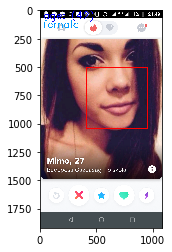

In [49]:
# draw the category label and color label on the image
agesText = "age: ({:.0f})".format(float(agesLabel))
print(gendertext)
fontsize = font_size_calculator(image.shape)
fontwidth = font_width_calculator(image.shape)
print(fontsize)
x_pos, y_pos = calculate_text_position(image.shape)
print(x_pos, y_pos)
cv2.putText(output, agesText, (x_pos, y_pos+10), cv2.FONT_HERSHEY_SIMPLEX,
	fontsize, (255, 0, 0), fontwidth)
cv2.putText(output, gendertext, (x_pos, y_pos*2+20), cv2.FONT_HERSHEY_SIMPLEX,
	fontsize, (255, 155, 0), fontwidth)
# display the predictions to the terminal as well
print("[INFO] {}".format(agesText))
# show the probabilities for each of the individual labels
cv2.imwrite(image_name + "_class.jpg",output)
outp = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
# show the output image
# print("[INFO] {} years old".format(label))
plt.imshow(outp,)

In [26]:
output.shape

(3083, 1734, 3)